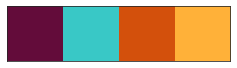

In [1]:
import numpy as np
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Import my spotify data
songs = pd.read_csv("Spotify-2000.csv")
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [3]:
songs = songs[['Title' , 'Artist' ,'Danceability',
                     'Loudness (dB)' ,'Speechiness' ,'Acousticness' ,'Liveness']]
songs.head()

,Title,Artist,Danceability,Loudness (dB),Speechiness,Acousticness,Liveness
0,Sunrise,Norah Jones,53,-14,3,94,11
1,Black Night,Deep Purple,50,-11,7,17,17
2,Clint Eastwood,Gorillaz,66,-9,17,2,7
3,The Pretender,Foo Fighters,43,-4,4,0,3
4,Waitin' On A Sunny Day,Bruce Springsteen,58,-5,3,1,10


In [4]:
# to describe numerical features we can use describe()
songs.describe()

,Danceability,Loudness (dB),Speechiness,Acousticness,Liveness
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,53.238215,-9.008526,4.994985,28.858074,19.012036
std,15.351507,3.647876,4.401566,29.011986,16.727378
min,10.000000,-27.000000,2.000000,0.000000,2.000000
25%,43.000000,-11.000000,3.000000,3.000000,9.000000
50%,53.000000,-8.000000,4.000000,18.000000,12.000000
75%,64.000000,-6.000000,5.000000,50.000000,23.000000
max,96.000000,-2.000000,55.000000,99.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002371DDEA6D0>,
      dtype=object)

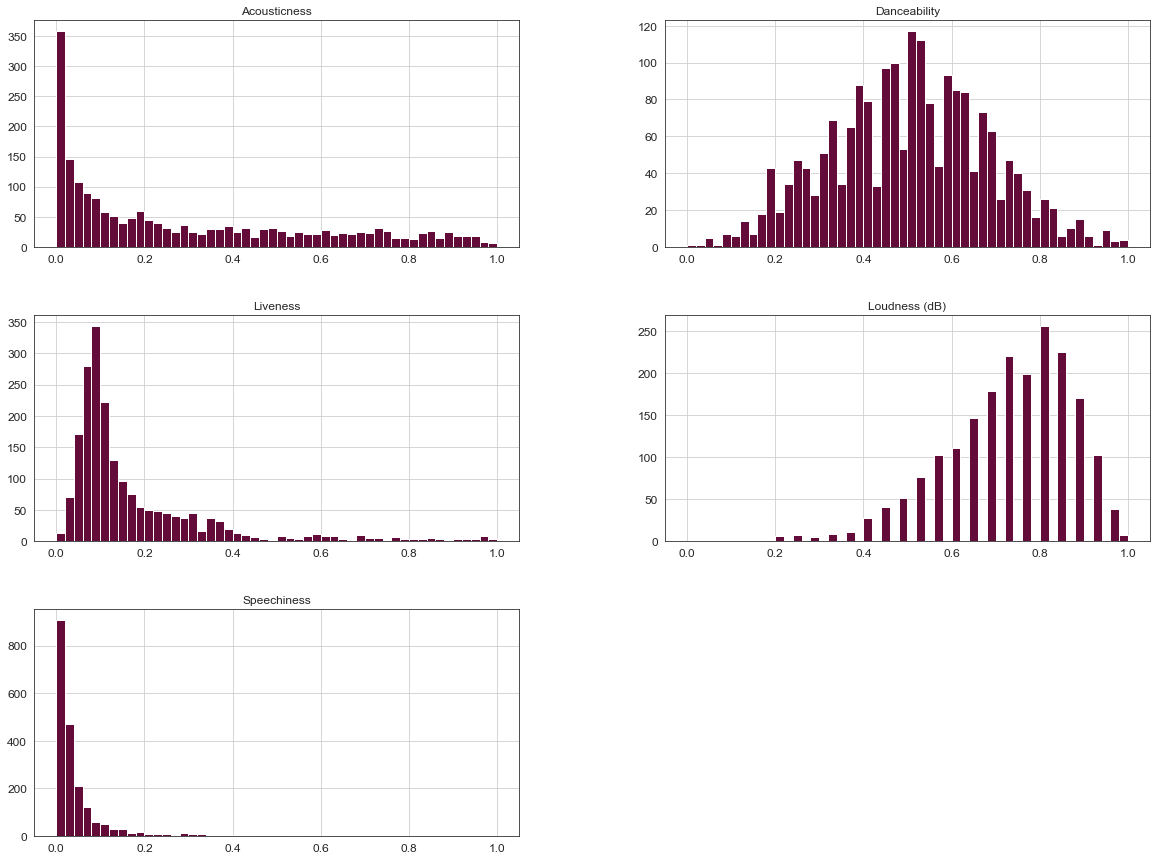

In [5]:
# feature scaling 
from sklearn import preprocessing

loudness = songs[['Loudness (dB)']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['Loudness (dB)'] = pd.DataFrame(loudness_scaled)


danc = songs[['Danceability']].values
danc_scaled = min_max_scaler.fit_transform(danc)
songs['Danceability'] = pd.DataFrame(danc_scaled)


speech = songs[['Speechiness']].values
speech_scaled = min_max_scaler.fit_transform(speech)
songs['Speechiness'] = pd.DataFrame(speech_scaled)


acoust = songs[['Acousticness']].values
acoust_scaled = min_max_scaler.fit_transform(acoust)
songs['Acousticness'] = pd.DataFrame(acoust_scaled)

live = songs[['Liveness']].values
live_scaled = min_max_scaler.fit_transform(live)
songs['Liveness'] = pd.DataFrame(live_scaled)




songs.hist(bins=50,figsize=(20,15))

In [6]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [7]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['Title','Artist'],axis=1)

In [8]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [9]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,20):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3947675207438496)
For n_clusters = 3, silhouette score is 0.35521381739026686)
For n_clusters = 4, silhouette score is 0.2706566001298479)
For n_clusters = 5, silhouette score is 0.24195330277245986)
For n_clusters = 6, silhouette score is 0.23578828494037088)
For n_clusters = 7, silhouette score is 0.2283683788715119)
For n_clusters = 8, silhouette score is 0.23507806432584213)
For n_clusters = 9, silhouette score is 0.21417834014618511)
For n_clusters = 10, silhouette score is 0.20800477912699344)
For n_clusters = 11, silhouette score is 0.2051886219308754)
For n_clusters = 12, silhouette score is 0.2066551708706308)
For n_clusters = 13, silhouette score is 0.20859862073450944)
For n_clusters = 14, silhouette score is 0.20836449409513577)
For n_clusters = 15, silhouette score is 0.20504490937384265)
For n_clusters = 16, silhouette score is 0.20276256883664565)
For n_clusters = 17, silhouette score is 0.20495629972673324)
For n_clusters = 18, 

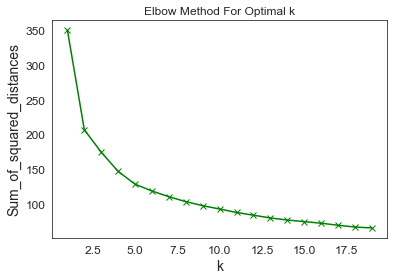

In [10]:
plt.plot(K[0:40], Sum_of_squared_distances[0:40], 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(songs_features)

KMeans(n_clusters=5)

In [12]:

# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

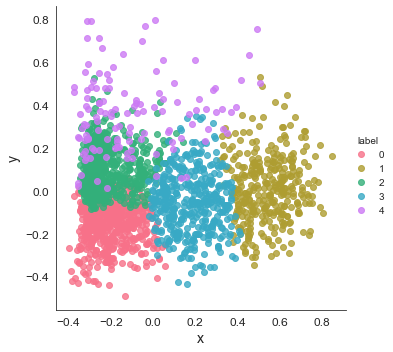

In [13]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [14]:
pca.explained_variance_ratio_

array([0.52522826, 0.19383837])

In [15]:
pca.explained_variance_

array([0.0922664 , 0.03405142])

In [16]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

2    570
0    565
3    411
1    325
4    123
Name: label, dtype: int64

In [17]:
songs[songs['label'] == 0].tail(10)

,Title,Artist,Danceability,Loudness (dB),Speechiness,Acousticness,Liveness,label
681,Zoutelande - feat. Geike,BLØF,0.662791,0.80,0.018868,0.222222,0.123711,0
1365,Kiss,Prince,0.930233,0.60,0.132075,0.010101,0.030928,0
1148,Weekend,Earth & Fire,0.895349,0.64,0.037736,0.373737,0.113402,0
1823,Smooth (feat. Rob Thomas),Santana,0.593023,0.92,0.018868,0.161616,0.288660,0
1377,Walk This Way (feat. Aerosmith),Run–D.M.C.,0.767442,0.56,0.056604,0.010101,0.041237,0
399,Changes,2Pac,0.895349,0.80,0.113208,0.040404,0.123711,0
524,Do I Wanna Know?,Arctic Monkeys,0.523256,0.76,0.018868,0.191919,0.206186,0
920,La Grange - 2005 Remaster,ZZ Top,0.523256,0.68,0.377358,0.000000,0.185567,0
1841,Folsom Prison Blues,Johnny Cash,0.686047,0.68,0.018868,0.191919,0.268041,0
537,Pompeii,Bastille,0.674419,0.84,0.037736,0.080808,0.257732,0


In [18]:
songs[songs['label'] == 1].tail(10)

,Title,Artist,Danceability,Loudness (dB),Speechiness,Acousticness,Liveness,label
50,Just Breathe,Pearl Jam,0.430233,0.64,0.018868,0.727273,0.061856,1
853,American Pie,Don McLean,0.500000,0.60,0.075472,0.707071,0.061856,1
1115,The Rose,Bette Midler,0.290698,0.68,0.018868,0.909091,0.371134,1
470,Skinny Love,Birdy,0.325581,0.76,0.056604,0.959596,0.103093,1
971,Landslide,Fleetwood Mac,0.360465,0.20,0.018868,0.888889,0.103093,1
1799,Tears in Heaven,Eric Clapton,0.465116,0.60,0.018868,0.848485,0.113402,1
1848,Yesterday - Remastered 2009,The Beatles,0.267442,0.60,0.018868,0.888889,0.072165,1
902,Harvest - 2009 Remaster,Neil Young,0.511628,0.36,0.037736,0.747475,0.092784,1
407,Don't Give up the Fight,Racoon,0.209302,0.56,0.018868,0.888889,0.103093,1
1890,Suzanne,Leonard Cohen,0.360465,0.44,0.037736,0.929293,0.092784,1


In [19]:
songs[songs['label'] == 2].tail(10)

,Title,Artist,Danceability,Loudness (dB),Speechiness,Acousticness,Liveness,label
992,Take It to the Limit - 2013 Remaster,Eagles,0.395349,0.72,0.000000,0.090909,0.113402,2
443,Walk,Foo Fighters,0.151163,0.88,0.056604,0.000000,0.278351,2
313,We Can Work It Out - Remastered 2015,The Beatles,0.325581,0.72,0.018868,0.060606,0.164948,2
1213,Rosanna,TOTO,0.325581,0.56,0.037736,0.020202,0.195876,2
574,Riddles,Kensington,0.453488,0.76,0.037736,0.040404,0.061856,2
1688,"Tonight, Tonight - Remastered 2012",The Smashing Pumpkins,0.220930,0.72,0.037736,0.000000,0.226804,2
833,Carry On,"Crosby, Stills, Nash & Young",0.418605,0.60,0.037736,0.060606,0.257732,2
511,Hopeless Wanderer,Mumford & Sons,0.197674,0.76,0.037736,0.010101,0.092784,2
1529,Jeremy,Pearl Jam,0.209302,0.84,0.037736,0.040404,0.164948,2
758,N Vriend,Andre Hazes,0.151163,0.80,0.018868,0.080808,0.072165,2


In [20]:
songs[songs['label'] == 3].tail(10)

,Title,Artist,Danceability,Loudness (dB),Speechiness,Acousticness,Liveness,label
726,Shallow,Lady Gaga,0.546512,0.84,0.018868,0.373737,0.216495,3
1166,The Turn of a Friendly Card,The Alan Parsons Project,0.325581,0.48,0.037736,0.525253,0.061856,3
1906,When I'm Sixty Four - Remastered 2009,The Beatles,0.697674,0.56,0.056604,0.636364,0.072165,3
653,When We Were Young,Adele,0.325581,0.84,0.056604,0.353535,0.072165,3
19,Cry Me a River,Justin Timberlake,0.604651,0.80,0.301887,0.575758,0.082474,3
35,The Eyes of Jenny,Sandy Coast,0.674419,0.60,0.037736,0.343434,0.061856,3
827,Fire and Rain,James Taylor,0.593023,0.52,0.037736,0.505051,0.061856,3
1705,Wereld Zonder Jou,Marco Borsato,0.546512,0.68,0.018868,0.515152,0.154639,3
1500,Wind Of Change,Scorpions,0.406977,0.68,0.037736,0.323232,0.082474,3
1199,Memory,Barbra Streisand,0.093023,0.48,0.037736,0.424242,0.092784,3


In [21]:
songs[songs['label'] == 4].tail(10)

,Title,Artist,Danceability,Loudness (dB),Speechiness,Acousticness,Liveness,label
633,"Oxygene, Pt. 4",Jean-Michel Jarre,0.383721,0.76,0.037736,0.020202,0.546392,4
790,About A Girl - Live Version,Nirvana,0.593023,0.72,0.094340,0.141414,0.731959,4
1369,Bigmouth Strikes Again - 2011 Remaster,The Smiths,0.348837,0.88,0.037736,0.070707,0.536082,4
46,Sweet Jane,Lou Reed,0.848837,0.68,0.075472,0.484848,0.701031,4
1373,"Fire - Live at the Winterland, San Francisco, ...",Bruce Springsteen,0.383721,0.24,0.283019,0.202020,0.989691,4
1077,Isn't It Time,The Babys,0.488372,0.80,0.150943,0.393939,0.824742,4
569,Born Slippy (Nuxx),Underworld,0.558140,0.72,0.037736,0.000000,0.463918,4
320,Geef Mij Je Angst,Guus Meeuwis,0.313953,0.64,0.056604,0.757576,0.979381,4
684,Thriller,Michael Jackson,0.767442,0.92,0.094340,0.080808,0.855670,4
1062,You Took The Words Right Out of My Mouth (Hot ...,Meat Loaf,0.418605,0.72,0.113208,0.252525,0.494845,4


In [22]:
songs[songs['label']==0].mean()

Danceability     0.668944
Loudness (dB)    0.740602
Speechiness      0.067490
Acousticness     0.102065
Liveness         0.124551
label            0.000000
dtype: float64

In [23]:
songs[songs['label']==1].mean()

Danceability     0.415778
Loudness (dB)    0.575508
Speechiness      0.040813
Acousticness     0.803326
Liveness         0.143410
label            1.000000
dtype: float64

In [24]:
songs[songs['label']==2].mean()

Danceability     0.376377
Loudness (dB)    0.784281
Speechiness      0.055081
Acousticness     0.070494
Liveness         0.161331
label            2.000000
dtype: float64

In [25]:
songs[songs['label']==3].mean()

Danceability     0.525661
Loudness (dB)    0.702579
Speechiness      0.045953
Acousticness     0.474502
Liveness         0.133143
label            3.000000
dtype: float64

In [26]:
songs[songs['label']==4].mean()

Danceability     0.478540
Loudness (dB)    0.761951
Speechiness      0.089431
Acousticness     0.221894
Liveness         0.699606
label            4.000000
dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [28]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[180   0   6   4   1]
 [  0 109   0   5   0]
 [  3   0 197   1   0]
 [  0   3   2 117   0]
 [  0   0   0   0  31]]


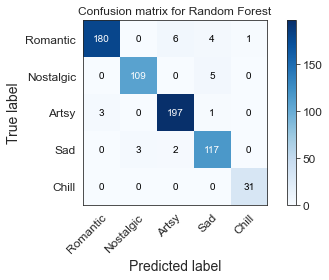

In [29]:
# Confusion matrix
definitions = ['Romantic' ,'Nostalgic' ,'Artsy' ,'Sad' ,'Chill']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [30]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('Danceability', 0.299422526677614),
 ('Loudness (dB)', 0.055149602997177395),
 ('Speechiness', 0.01726621997418035),
 ('Acousticness', 0.4786735056716972),
 ('Liveness', 0.14948814467933097)]

In [31]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[188   0   2   1   0]
 [  0 113   0   1   0]
 [  2   0 194   5   0]
 [  0   0   0 122   0]
 [  0   0   1   0  30]]


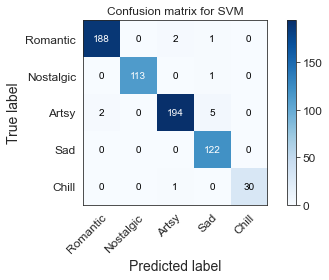

In [32]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [33]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

    Romantic       0.99      0.98      0.99       191
   Nostalgic       1.00      0.99      1.00       114
       Artsy       0.98      0.97      0.97       201
         Sad       0.95      1.00      0.97       122
       Chill       1.00      0.97      0.98        31

    accuracy                           0.98       659
   macro avg       0.98      0.98      0.98       659
weighted avg       0.98      0.98      0.98       659
SVM


In [34]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

    Romantic       0.98      0.94      0.96       191
   Nostalgic       0.97      0.96      0.96       114
       Artsy       0.96      0.98      0.97       201
         Sad       0.92      0.96      0.94       122
       Chill       0.97      1.00      0.98        31

    accuracy                           0.96       659
   macro avg       0.96      0.97      0.96       659
weighted avg       0.96      0.96      0.96       659
forest
